In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os, sys

from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
import tensorflow as tf


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K

2022-03-28 15:08:35.236714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vever/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-03-28 15:08:35.236746: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


https://www.tensorflow.org/tutorials/images/cnn

#### Partie 1: base de données, analyse et préparation

In [2]:
# Ouverture dossier 0 pour test
chemin = "./MNIST Dataset JPG format/MNIST - JPG - training/0"
donnees = os.listdir( chemin )

# Affiche tous les fichiers dans le dossier 0
count=0
for i in donnees:
    count+=1

print(count)



5923


#### Préparation données TRAIN

In [3]:
directory = './MNIST Dataset JPG format/MNIST - JPG - training'

train_images = []
train_labels = []

for i in os.listdir(directory):
    Path = directory+"/"+i
    for j in os.listdir(Path):
        image = cv2.imread(Path+"/"+j)
        train_images.append(image)
        train_labels.append(int(i))

#### Préparation données TEST

In [4]:
directory = './MNIST Dataset JPG format/MNIST - JPG - testing'

test_images = []
test_labels = []

for i in os.listdir(directory):
    Path = directory+"/"+i
    for j in os.listdir(Path):
        image = cv2.imread(Path+"/"+j)
        test_images.append(image)
        test_labels.append(int(i))
        
train = np.array(train_images)        
test = np.array(test_images)

In [5]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train / 255, test / 255

Tracer 25 images aléatoires associées à leur classes

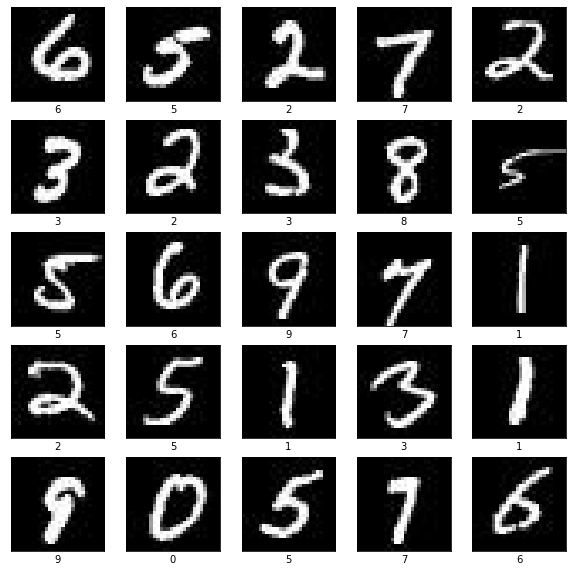

In [6]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    waiwai = np.random.randint(0,60000,[1])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[waiwai[0]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[waiwai[0]]])
plt.show()


#### Partie 2 : Architecture CNN sur Tensorflow

#### Créer la base convolutive:

Les 6 lignes de code ci-dessous définissent la base convolutive en utilisant un modèle commun : une pile de couches Conv2D et MaxPooling2D .

En entrée, un CNN prend des tenseurs de forme (image_height, image_width, color_channels), en ignorant la taille du lot. Si vous débutez avec ces dimensions, color_channels fait référence à (R,G,B). Dans cet exemple, vous allez configurer votre CNN pour traiter les entrées de forme (32, 32, 3), qui est le format des images CIFAR. Vous pouvez le faire en passant l'argument input_shape à votre première couche.

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2022-03-28 15:08:41.910838: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vever/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-03-28 15:08:41.910876: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-28 15:08:41.910897: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vever-VirtualBox): /proc/driver/nvidia/version does not exist
2022-03-28 15:08:41.911130: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Architecture du modèle

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 53,904
Trainable params: 53,904
Non-traina

#### Ajouter des couches denses sur le dessus

Pour compléter le modèle, vous allez alimenter le dernier tenseur de sortie de la base convolutive (de forme (4, 4, 64)) dans une ou plusieurs couches denses pour effectuer la classification. Les couches denses prennent des vecteurs en entrée (qui sont 1D), tandis que la sortie actuelle est un tenseur 3D. Tout d'abord, vous allez aplatir (ou dérouler) la sortie 3D en 1D, puis ajouter un ou plusieurs calques Dense par-dessus. CIFAR a 10 classes de sortie, vous utilisez donc une couche Dense finale avec 10 sorties.

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

#### Compiler et entraîner le modèle

In [11]:
train_images = np.array(train_images)
test_images = np.array(test_images)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10


2022-03-28 15:08:43.275400: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 564480000 exceeds 10% of free system memory.


1875/1875 [==============================] - 41s 21ms/step - loss: 0.1408 - accuracy: 0.9564 - val_loss: 0.0388 - val_accuracy: 0.9877
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0308 - val_accuracy: 0.9892
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0302 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0253 - accuracy: 0.9923 - val_loss: 0.0466 - val_accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0317 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0348 - val_accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.0522 - val_accura

#### Evaluer le modèle

313/313 - 2s - loss: 0.0395 - accuracy: 0.9906 - 2s/epoch - 6ms/step


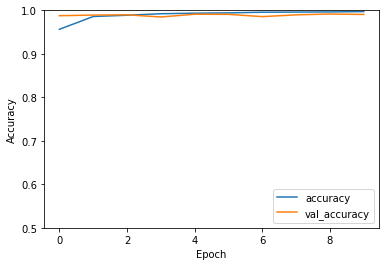

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:
print(test_acc)

0.9905999898910522


#### Partie 3 : Tester l’efficacité du modèle

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [31]:
image_a_tester = cv2.imread('./images_manuelles/00.jpg')
image_a_tester = np.expand_dims(image_a_tester,axis=0)


print(image_a_tester.shape)

(1, 28, 28, 3)


In [32]:
probability_model.predict(image_a_tester)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Test lecture d'une image '0' faite manuellement 

Bien reconnu en tant que '0'

In [52]:
OK = cv2.imread('./images_manuelles/00.jpg')
OK= np.expand_dims(OK,axis=0)
probability_model.predict(OK)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Test lecture d'une image '1' faite manuellement 

Bien reconnu en tant que '1'

In [53]:
OK = cv2.imread('./images_manuelles/01.jpg')
OK= np.expand_dims(OK,axis=0)
probability_model.predict(OK)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Test lecture d'une image '2' faite manuellement 

Bien reconnu en tant que '2'

In [54]:
OK = cv2.imread('./images_manuelles/02.jpg')
OK= np.expand_dims(OK,axis=0)
probability_model.predict(OK)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)